# Manipulation et visualisation des données avec Pandas et Matplotlib

Pandas est une librairie spécialisée dans l'analyse des données. Dans cet atelier, on s'intéresse surtout aux fonctionalités de manipulations de données.

## 1. Chargement et description des données 

### 1.1. Librairie Pandas - options et version

In [1]:
# Première étape : il faut charger la librarie Pandas
import pandas

# On modifie le nombre de ligne à afficher
pandas.options.display.max_rows =10

# On vérifie la version
print(pandas.__version__)

0.20.3


### 1.2. Structure DataFrame

Une DataFrame correspond à une matrice individus-variables où les lignes corerspondent à des observations, les colonnes à des attribus décrivant les individus.

Concernant le fichier "heart.txt" : la première ligne correspond aux noms des champs (des variables); à partir de la seconde ligne, on dispose des valeurs pour chaque enregistrement (individu); le caractère "\t" fait office de séparateur de colonnes.

In [2]:
# chargement du fichier
# df est le nom du DataFrame créé
# sep spécifie le caractère séparateur de colonnes
# header =0 pour spécifier que la ligne numéro 0 représente les noms des varibales
df = pandas.read_table("heart.txt", sep ='\t',  header =0)

# vérification du type de df
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# afficher les premières lignes du jeu de données
df.head()

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,70,masculin,D,130,322,A,C,109,non,24,2,D,presence
1,67,feminin,C,115,564,A,C,160,non,16,2,A,absence
2,57,masculin,B,124,261,A,A,141,non,3,1,A,presence
3,64,masculin,D,128,263,A,A,105,oui,2,2,B,absence
4,74,feminin,B,120,269,A,C,121,oui,2,1,B,absence


In [4]:
# dimensions : nombre de lignes et nombre de colonnes
# La ligne d'en-tête n'est pas comptabilisée
print(df.shape)

(270, 13)


In [5]:
# énumération des colonnes
print(df.columns)

Index(['age', 'sexe', 'type_douleur', 'pression', 'cholester', 'sucre',
       'electro', 'taux_max', 'angine', 'depression', 'pic', 'vaisseau',
       'coeur'],
      dtype='object')


In [6]:
# type de chaque colonnes
print(df.dtypes)

age              int64
sexe            object
type_douleur    object
pression         int64
cholester        int64
                 ...  
angine          object
depression       int64
pic              int64
vaisseau        object
coeur           object
dtype: object


In [7]:
# informations sur les données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
age             270 non-null int64
sexe            270 non-null object
type_douleur    270 non-null object
pression        270 non-null int64
cholester       270 non-null int64
sucre           270 non-null object
electro         270 non-null object
taux_max        270 non-null int64
angine          270 non-null object
depression      270 non-null int64
pic             270 non-null int64
vaisseau        270 non-null object
coeur           270 non-null object
dtypes: int64(6), object(7)
memory usage: 27.5+ KB
None


In [8]:
# description des données
df.describe(include='all')

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
count,270.000000,270,270,270.000000,270.000000,270,270,270.000000,270,270.0,270.000000,270,270
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,NaN,4,2
top,NaN,masculin,D,NaN,NaN,A,C,NaN,non,NaN,NaN,A,absence
freq,NaN,183,129,NaN,NaN,230,137,NaN,181,NaN,NaN,160,150
mean,54.433333,NaN,NaN,131.344444,249.659259,NaN,NaN,149.677778,NaN,10.5,1.585185,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.0,1.000000,NaN,NaN
25%,48.000000,NaN,NaN,120.000000,213.000000,NaN,NaN,133.000000,NaN,0.0,1.000000,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,245.000000,NaN,NaN,153.500000,NaN,8.0,2.000000,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,280.000000,NaN,NaN,166.000000,NaN,16.0,2.000000,NaN,NaN


Certains indicateurs statistiques ne sont pas valables que pour les variables numériques (ex. moyenne, médiane, etc. pour age, taux_max, ...) et inversement pour les non-numériques (ex. top, freq, etc. pour sexe, type_douleur, ...), d'où les NAN dans certaines situations.

## 2. Manipulation des variables

### 2.1. Accès aux variables

Il est possible d'accéder explicitement aux variables. Dans un premier temps, on utilise directement les noms des champs (les noms des variables, en en-tête de colonnes).

In [9]:
# accès à une colonne
print(df['sexe'])

0      masculin
1       feminin
2      masculin
3      masculin
4       feminin
         ...   
265    masculin
266    masculin
267     feminin
268    masculin
269    masculin
Name: sexe, dtype: object


In [10]:
# autre manière d'accèder à une variable par le nom
print(df.sexe)

0      masculin
1       feminin
2      masculin
3      masculin
4       feminin
         ...   
265    masculin
266    masculin
267     feminin
268    masculin
269    masculin
Name: sexe, dtype: object


In [11]:
# accéder à un ensemble de colonnes
df[['sexe','sucre']]

,sexe,sucre
0,masculin,A
1,feminin,A
2,masculin,A
3,masculin,A
4,feminin,A
...,...,...
265,masculin,B
266,masculin,A
267,feminin,A
268,masculin,A


In [12]:
# affichage des premières valeurs d'une colonne
print(df.age.head())

0    70
1    67
2    57
3    64
4    74
Name: age, dtype: int64


In [13]:
# affichage des dernières valeurs
print(df.age.tail())

265    52
266    44
267    56
268    57
269    67
Name: age, dtype: int64


In [14]:
# statistique decsriptive d'une colonne
print(df.age.describe())

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


In [15]:
# calculer explicitement la moyenne
print(df.age.mean())

54.43333333333333


In [16]:
# comptage des valeurs
print(df.type_douleur.value_counts())

D    129
C     79
B     42
A     20
Name: type_douleur, dtype: int64


In [17]:
# première valeur
print(df.age[0])

70


In [18]:
# 3 premières valeurs
print(df.age[0:3])

0    70
1    67
2    57
Name: age, dtype: int64


In [19]:
# trier les valeurs d'une variable de manière croissante
print(df.age.sort_values())

214    29
174    34
138    34
224    35
81     35
       ..
15     71
255    71
4      74
73     76
199    77
Name: age, dtype: int64


In [20]:
# on peut aussi obtenir les indices des valeurs triées
print(df.age.argsort())

0      214
1      174
2      138
3      224
4       81
      ... 
265     15
266    255
267      4
268     73
269    199
Name: age, dtype: int64


214 est le numéro de l'individu portant la plus petite valeur de la variable age, puis vient le n°174, etc. Ces résultats sont complètement cohérents avec ceux

In [21]:
# le tri peut être généralisé aux DataFrame
df.sort_values(by='age').head()

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
214,29,masculin,B,130,204,A,C,202,non,0,1,A,absence
174,34,masculin,A,118,182,A,C,174,non,0,1,A,absence
138,34,feminin,B,118,210,A,A,192,non,7,1,A,absence
224,35,feminin,D,138,183,A,A,182,non,14,1,A,absence
81,35,masculin,D,120,198,A,A,130,oui,16,2,A,presence


### 2.2. Itérations sur les variables

Les itérations sur les varibles peuvent se faire via une boucle, ou via l'utilisation des fonctions callback appelée à l'aide d'une fonction .apply().

In [22]:
# boucler sur l'ensemble des colonnes
for col in df.columns:
    print(df[col].dtype)

int64
object
object
int64
int64
object
object
int64
object
int64
int64
object
object


In [23]:
# passage par la librairie numpy
import numpy

# fonction call back
def operation(x):
    return(x.mean())

# appel de la fonction sur l'ensemble des colonnes du DataFrame
# axis =0 ==> chaque colonne sera transmise à la fonction operation()
# la selection select_dtype() permet d'exclure les variables non numériques
resultat = df.select_dtypes(exclude=['object']).apply(operation, axis=0)
print(resultat)

age            54.433333
pression      131.344444
cholester     249.659259
taux_max      149.677778
depression     10.500000
pic             1.585185
dtype: float64


## 3. Accès indicé aux données d'un DataFrame


On peut accéder aux valeurs du DataFrame via des indices ou plages d'indice. La structure se comporte alors comme une matrice. La cellule en haut et à gauche est de coordonnée (0,0).

Il ya différentes manières de le faire, l'utilisation de .iloc[,] constitue une des solutions les plus simples. 

In [24]:
# accès à la valeur située en (0,0)
print(df.iloc[0,0])

70


In [25]:
# valeur située en dernière ligne, première colonne
print(df.iloc[-1,0])

67


In [26]:
# 5 premières valeurs de toutes les colonnes
# lignes ==> 0:5 (0 à 5 (non inclus))
# colonnes ==> : (toutes les colonnes)
df.iloc[0:5,:]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,70,masculin,D,130,322,A,C,109,non,24,2,D,presence
1,67,feminin,C,115,564,A,C,160,non,16,2,A,absence
2,57,masculin,B,124,261,A,A,141,non,3,1,A,presence
3,64,masculin,D,128,263,A,A,105,oui,2,2,B,absence
4,74,feminin,B,120,269,A,C,121,oui,2,1,B,absence


In [27]:
# avec l'indiçage négatif, on peut facilement accéder aux 5 dernières lignes
df.iloc[-5:,:]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
265,52,masculin,C,172,199,B,A,162,non,5,1,A,absence
266,44,masculin,B,120,263,A,A,173,non,0,1,A,absence
267,56,feminin,B,140,294,A,C,153,non,13,2,A,absence
268,57,masculin,D,140,192,A,A,148,non,4,2,A,absence
269,67,masculin,D,160,286,A,C,108,oui,15,2,D,presence


In [28]:
# 5 premières lignes et 2 premières colonnes
df.iloc[0:5,0:2]

,age,sexe
0,70,masculin
1,67,feminin
2,57,masculin
3,64,masculin
4,74,feminin


In [29]:
# 5 premières lignes et les colonnes 0,1 et 4
df.iloc[0:5,[0,1,4]]

,age,sexe,cholester
0,70,masculin,322
1,67,feminin,564
2,57,masculin,261
3,64,masculin,263
4,74,feminin,269


## 4. Restrictions avec les conditions - les requêtes

On peut isloer les sous-ensembles d'observations répondant à des critères définis sur les champs. On utilisera préférentiellement la méthode .loc[,].

In [30]:
# liste des individus présentant une douleur de type A
df.loc[df['type_douleur']=="A",:]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
13,61,masculin,A,134,234,A,A,145,non,26,2,C,presence
18,64,masculin,A,110,211,A,C,144,oui,18,2,A,absence
19,40,masculin,A,140,199,A,A,178,oui,14,1,A,absence
37,59,masculin,A,160,273,A,C,125,non,0,1,A,presence
63,60,feminin,A,150,240,A,A,171,non,9,1,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,69,feminin,A,140,239,A,A,151,non,18,1,C,absence
205,52,masculin,A,152,298,B,A,178,non,12,2,A,absence
210,59,masculin,A,170,288,A,C,159,non,2,2,A,presence
228,58,feminin,A,150,283,B,C,162,non,10,1,A,absence


In [31]:
# indexer avec un vecteur de booléens
print(df['type_douleur']=="A")

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Name: type_douleur, dtype: bool


Seules les observations correspondant à True sont repris par .loc[,]. On peut les compter

In [32]:
print((df['type_douleur']=="A").value_counts())

False    250
True      20
Name: type_douleur, dtype: int64


In [33]:
# pour un ensemble de valeurs de la la même variable, on utilise isin()
df.loc[df['type_douleur'].isin(['A','B']), :]

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
2,57,masculin,B,124,261,A,A,141,non,3,1,A,presence
4,74,feminin,B,120,269,A,C,121,oui,2,1,B,absence
13,61,masculin,A,134,234,A,A,145,non,26,2,C,presence
18,64,masculin,A,110,211,A,C,144,oui,18,2,A,absence
19,40,masculin,A,140,199,A,A,178,oui,14,1,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,58,masculin,B,120,284,A,C,160,non,18,2,A,presence
263,49,masculin,B,130,266,A,A,171,non,6,1,A,absence
264,48,masculin,B,110,229,A,A,168,non,10,3,A,presence
266,44,masculin,B,120,263,A,A,173,non,0,1,A,absence


In [34]:
# on peut afficher qu'une partie des colonnes
colonnes = ['age','sexe','type_douleur','pression','cholesterol','angine','coeur']
df.loc[df['type_douleur'].isin(['A','B']), colonnes]

,age,sexe,type_douleur,pression,cholesterol,angine,coeur
2,57,masculin,B,124,NaN,non,presence
4,74,feminin,B,120,NaN,oui,absence
13,61,masculin,A,134,NaN,non,presence
18,64,masculin,A,110,NaN,oui,absence
19,40,masculin,A,140,NaN,oui,absence
...,...,...,...,...,...,...,...
262,58,masculin,B,120,NaN,non,presence
263,49,masculin,B,130,NaN,non,absence
264,48,masculin,B,110,NaN,non,presence
266,44,masculin,B,120,NaN,non,absence


Des opérateurs logiques permettent de combiner des conditions. On utilise respectivement : & pour ET, | pour OU et ~ pour la négation.

In [35]:
# liste des individus présentant une douleur de type A et angine == oui
df.loc[(df['type_douleur']=="A") & (df['angine']=="oui"),colonnes]

,age,sexe,type_douleur,pression,cholesterol,angine,coeur
18,64,masculin,A,110,NaN,oui,absence
19,40,masculin,A,140,NaN,oui,absence
143,51,masculin,A,125,NaN,oui,absence
160,38,masculin,A,120,NaN,oui,presence


In [36]:
# liste des individus de moins de 45 ans, de sexe masculin et présentant une maladie cardiaque
df.loc[(df['age']<45) & (df['sexe']=="masculin") & (df['coeur']=="presence"),colonnes]

,age,sexe,type_douleur,pression,cholesterol,angine,coeur
40,40,masculin,D,152,NaN,non,presence
47,44,masculin,D,110,NaN,non,presence
50,42,masculin,D,136,NaN,oui,presence
81,35,masculin,D,120,NaN,oui,presence
147,40,masculin,D,110,NaN,oui,presence
...,...,...,...,...,...,...,...
182,41,masculin,D,110,NaN,non,presence
193,35,masculin,D,126,NaN,oui,presence
231,39,masculin,D,118,NaN,non,presence
237,43,masculin,D,120,NaN,oui,presence


## 5. Calculs récapitulatifs - Croisement des variables

On peut procéder à des croisements et opérer des calculs récapitulatifs, qui vont du comptage simple aux calculs statistiques faisant intervenir plusieurs varibales.

In [37]:
# fréquence selon sexe et coeur
pandas.crosstab(df['sexe'],df['coeur'])

coeur,absence,presence
sexe,,
feminin,67,20
masculin,83,100


In [38]:
# on peut demander un post-traitement, par exemple, un pourcentage en ligne
pandas.crosstab(df['sexe'],df['coeur'],normalize='index')

coeur,absence,presence
sexe,,
feminin,0.770115,0.229885
masculin,0.453552,0.546448


In [39]:
# On peut insérer un champ calculé, par exemple, la moyenne d'âge selon sexe et coeur
# on utilise la fonction mean() de la classe Series de la librairie Pandas
pandas.crosstab(df['sexe'],df['coeur'], values=df['age'],aggfunc=pandas.Series.mean)

coeur,absence,presence
sexe,,
feminin,54.582090,59.35
masculin,51.192771,56.04


In [40]:
# On peut aussi utiliser la commande pivot_table()
df.pivot_table(index=['sexe'],columns=['coeur'],values=['age'],aggfunc=pandas.Series.mean)

age         
coeur       absence presence
sexe                        
feminin   54.582090    59.35
masculin  51.192771    56.04

In [41]:
# multiplier les critères est possible
pandas.crosstab([df['sexe'],df['sucre']],df['coeur'])

coeur           absence  presence
sexe     sucre                   
feminin  A           61        15
         B            6         5
masculin A           66        88
         B           17        12

In [42]:
pandas.crosstab([df['sexe'],df['sucre']],df['coeur'],normalize='index')

coeur            absence  presence
sexe     sucre                    
feminin  A      0.802632  0.197368
         B      0.545455  0.454545
masculin A      0.428571  0.571429
         B      0.586207  0.413793

L'utilisation de groupby() permet d'accéder aux sous-DataFrame associés à chaque item de la variable de regroupement. Il est dès lors possible d'appliquer explicitement d'autres traitements sur ces sous-ensembles de données.

In [43]:
# regroupement des données selon le sexe
g=df.groupby('sexe')

# calculer la dimension du sous-DataFrame associé aux hommes
print(g.get_group('masculin').shape)

(183, 13)


In [44]:
# calculer la moyenne des variables numériques
g.mean()

,age,pression,cholester,taux_max,depression,pic
sexe,,,,,,
feminin,55.678161,132.965517,264.747126,152.229885,8.885057,1.540230
masculin,53.841530,130.573770,242.486339,148.464481,11.267760,1.606557


In [45]:
# calculer la moyenne de l'âge chez les hommes
print(g.get_group('masculin')['age'].mean())

53.84153005464481


on peut appliquer différentes fonctions
$$mean:=m=\frac{1}{n}\sum_{i=1}^nx_i,\;variance:=var=\frac{1}{n-1}\sum_{i=1}^n\left(x_i-m\right)^2,\;ecart\_type:=std=\sqrt{var}$$

In [46]:
g['age','depression'].agg([pandas.Series.mean,pandas.Series.std])

age           depression           
               mean       std       mean        std
sexe                                               
feminin   55.678161  9.626144   8.885057  11.332630
masculin  53.841530  8.818189  11.267760  11.459408

In [47]:
# on peut itérer sur les groupes
for groupe in g:
    # groupe est un tuple
    print(groupe[0]) # étiquette du groupe
    # accès à la variable 'age' du groupe concerné
    print(pandas.Series.mean(groupe[1]['age']))

feminin
55.67816091954023
masculin
53.84153005464481


## 6. Construction de variables calculées

Comme sous Numpy, les calculs sont vectorisés pour les vecteurs de type Series de Pandas. Ce qui évite de passer par des boucles fastidieuses pour manipuler les valeurs des vecteurs.

In [48]:
# création d'une variable tau_net (aucune signification médicale)
# utilisation de la librairie numpy (log = logarithme népérien)
import numpy
taux_net = df['taux_max']*numpy.log(df['age'])
print(taux_net)

0      463.085981
1      672.750819
2      570.070229
3      436.682724
4      520.791876
          ...    
265    640.101482
266    654.664807
267    615.878809
268    598.371588
269    454.106803
dtype: float64


In [49]:
# concatination à la DataFrame
newdf = pandas.concat([df,taux_net],axis=1)
print(newdf.shape)

(270, 14)


On souhaite créer une indicatrice pour la variable sexe, 1 pour masculin, 0 pour féminin.

In [50]:
# création d'une série de zéro de même longueur que la DataFrame (nombre de lignes)
code=pandas.Series(numpy.zeros(df.shape[0]))
print(code.shape)

(270,)


In [51]:
# les "sexe=masculin" sont codés en 1
code[df['sexe']=="masculin"]=1
print(code.value_counts())

1.0    183
0.0     87
dtype: int64


## 7. Graphiques

Passer par Matplotlib permet de réaliser des graphiques performants. Mais il faut connaître les procédures de la librairie. 

Pandas propose des commandes simples qui encapsulent l'appel à ces procédures.

In [52]:
# voir les graphiques dans le notebook
%matplotlib inline
# importation de librairie
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ca1b96d8>]], dtype=object)

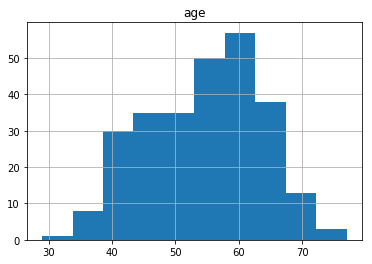

In [53]:
# histogramme de l'âge
df.hist(column='age')

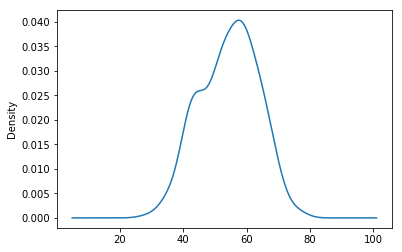

In [54]:
# density plot
df['age'].plot.kde()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c0430b38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f72c03e1080>], dtype=object)

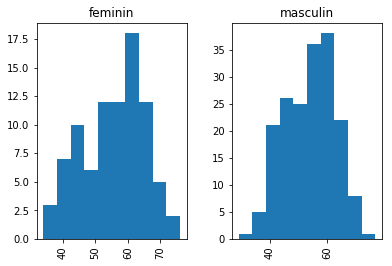

In [55]:
# histogramme de l'âge selon le sexe
df.hist(column='age', by='sexe')

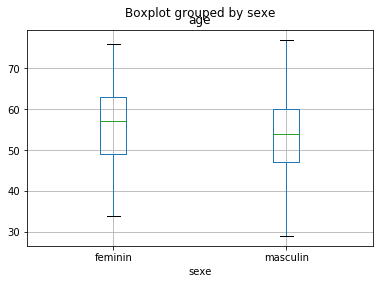

In [56]:
# comparaison des distributions avec boxplot
df.boxplot(column='age', by='sexe')

* La valeur centrale du graphique est la médiane (il existe autant de valeur supérieures qu’inférieures à cette valeur dans l’échantillon).
* Les bords du rectangle sont les quartiles (Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quart ont des valeurs plus grandes, le bord supérieur suit le même raisonnement).
* Les extrémités des moustaches sont calculées en utilisant 1.5 fois l’espace interquartile (la distance entre le 1er et le 3ème quartile).

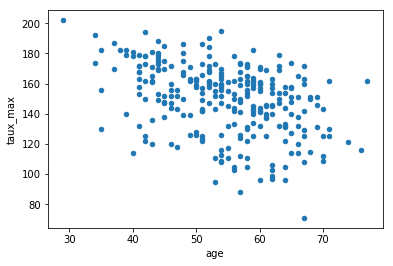

In [57]:
# scatterplot : âge vs taux_max
df.plot.scatter(x='age',y='taux_max')

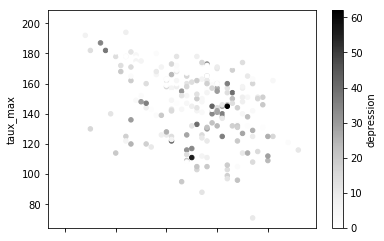

In [58]:
# niveau de gris selon la valeur de dépression
df.plot.scatter(x='age',y='taux_max',c='depression')

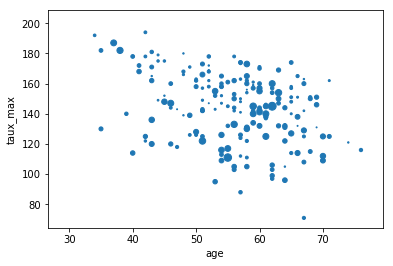

In [59]:
# taille des points selon la valeur de dépression
df.plot.scatter(x='age',y='taux_max',s=df['depression'])

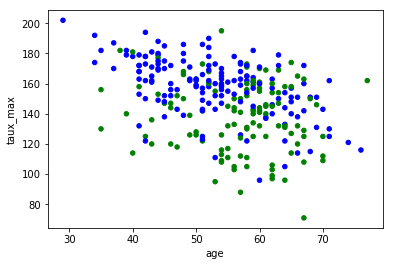

In [60]:
# en distinguant selon la valeur de coeur
# recodage de coeur - ici en 0/1
code_coeur=df['coeur'].eq('presence').astype('int')
# afficher le graphique en spécifiant la couleur (blue=0, green =1)
df.plot.scatter(x='age',y='taux_max',c=pandas.Series(['blue','green'])[code_coeur])

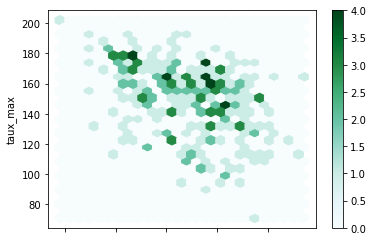

In [61]:
# grille à la carte de Kohonen - permet de voir la densité des points
df.plot.hexbin(x='age',y='taux_max',gridsize=25)

Les tracés Hexbin peuvent être une alternative utile aux diagrammes de dispersion si vos données sont trop denses pour tracer chaque point individuellement.

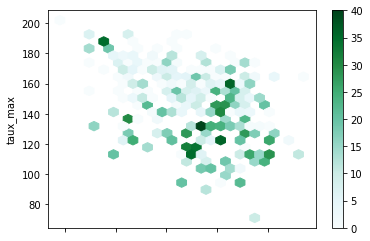

In [62]:
# calcul de la moyenne pour un vecteur
def moyenne(v):
    return(numpy.mean(v))

# grille à la carte de Kohonen où la couleur dépend de la moyenne de dépression
df.plot.hexbin(x='age',y='taux_max',C='depression', reduce_C_function=moyenne, gridsize=25)

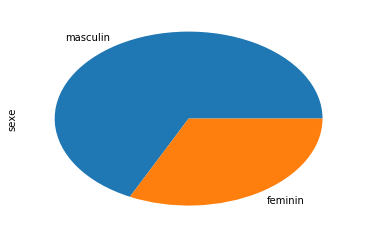

In [63]:
# diagramme à secteurs - comptage de sexe
df['sexe'].value_counts().plot.pie()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72bfcc6780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f72bef10b00>]], dtype=object)

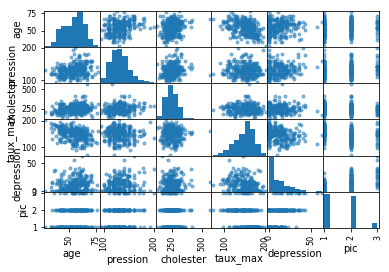

In [64]:
# scatterpolt des variables pris deux à deux
# uniquement les variables quantitatives 
pandas.tools.plotting.scatter_matrix(df.select_dtypes(exclude=['object']))